In [6]:
!pip install wget

In [7]:
import wget
#下載字型ChineseFont.ttf
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont (1).ttf'

In [4]:
import numpy as np

# 生成 5 個符合均值 0、標準差 1 的正態分佈數值
normal_data = np.random.normal(loc=0, scale=1, size=5)
print(normal_data)

[ 0.99862351 -0.85605126 -0.23150287  1.72196056 -0.36250397]


## Q-Q 圖 (Quantile-Quantile Plot) 說明
Q-Q 圖是用來評估數據是否符合特定理論分佈的視覺化工具，最常用於檢驗數據是否呈常態分佈。

### 原理說明
#### 1. 基本概念

- Q-Q 圖將數據的分位數與理論分佈的分位數進行比較
- X軸代表理論分佈（在這裡是常態分佈）的分位數
- Y軸代表實際數據的分位數

#### 2. 判讀方式

- 如果點落在對角線上或接近對角線，表示數據符合理論分佈
- 點的分佈形態可以顯示偏離常態的方式：
- 彎曲：表示偏態
- 傾斜：表示變異數不同
- S形：表示尾部較重或較輕

樣本均值: -0.0048
理論均值: 0
樣本標準差: 0.9932
理論標準差: 1

Shapiro-Wilk 檢定結果:
p值: 0.8087
是否為常態分佈: True


/opt/conda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


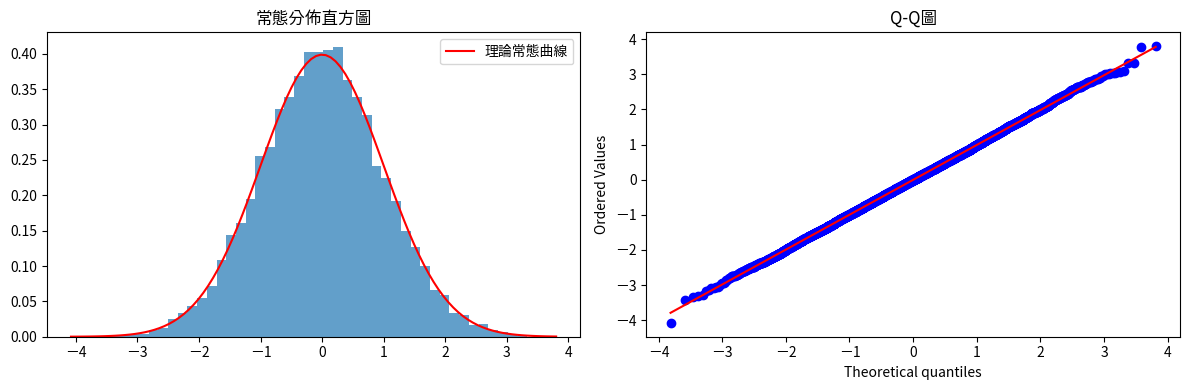

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

#中文字型
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
# 為了得到更可靠的結果，我們需要更大的樣本量
sample_size = 10000
normal_data = np.random.normal(loc=0, scale=1, size=sample_size)

# 1. 驗證均值接近0
print(f"樣本均值: {np.mean(normal_data):.4f}")
print(f"理論均值: 0")

# 2. 驗證標準差接近1
print(f"樣本標準差: {np.std(normal_data):.4f}")
print(f"理論標準差: 1")

# 3. 進行常態性檢定
# 使用 Shapiro-Wilk 檢定，當p值>0.05時，表示數據符合常態分佈
statistic, p_value = stats.shapiro(normal_data)
print(f"\nShapiro-Wilk 檢定結果:")
print(f"p值: {p_value:.4f}")
print(f"是否為常態分佈: {p_value > 0.05}")

# 4. 視覺化檢查
plt.figure(figsize=(12, 4))

# 直方圖
plt.subplot(121)
plt.hist(normal_data, bins=50,density=True,alpha=0.7)
plt.title("常態分佈直方圖")

# 添加理論常態分佈曲線
x = np.linspace(min(normal_data), max(normal_data), 100)
plt.plot(x, stats.norm.pdf(x, loc=0, scale=1), 'r-', label='理論常態曲線')
plt.legend()

# Q-Q圖
plt.subplot(122)
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title("Q-Q圖")

plt.tight_layout()
plt.show()